In [37]:
# Import modules and packages
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

In [38]:
df = pd.read_csv('G_ti.csv')
df

,Unnamed: 0,Datetime,Open,High,Low,Close,Adj Close,Volume,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,STOK,STOD
0,0,2021-02-10 09:30:00-05:00,2094.209961,2108.370117,2094.209961,2108.370117,2108.370117,82140,0.000000,82140,0.000,0.000,0.000,0.0,0.000000,0.000000,0.000000
1,1,2021-02-10 09:35:00-05:00,2106.271973,2106.271973,2097.649902,2101.044922,2101.044922,20756,0.000000,20756,0.000,0.000,0.000,0.0,0.000000,0.000000,0.000000
2,2,2021-02-10 09:40:00-05:00,2098.885010,2098.885010,2091.550049,2094.080078,2094.080078,12544,0.000000,12544,0.000,0.000,0.000,0.0,30.530765,0.000000,0.000000
3,3,2021-02-10 09:45:00-05:00,2094.389893,2100.000000,2094.389893,2098.324951,2098.324951,9285,0.000000,9285,0.000,0.000,0.000,0.0,60.404103,23.037956,0.000000
4,4,2021-02-10 09:50:00-05:00,2097.370117,2102.944580,2097.370117,2100.110107,2100.110107,17736,0.000000,17736,0.000,0.000,0.000,0.0,-3.732506,33.080712,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,3036,2021-04-07 15:35:00-04:00,2243.000000,2245.770020,2242.889893,2245.770020,2245.770020,5021,44.303086,5021,2249.762,2253.128,2246.395,-44.0,12.396891,12.765912,-14.727064
3037,3037,2021-04-07 15:40:00-04:00,2247.794922,2249.939941,2247.790039,2248.919922,2248.919922,9500,49.846916,9500,2249.909,2253.164,2246.654,-48.0,7.504709,56.113426,11.708412
3038,3038,2021-04-07 15:45:00-04:00,2249.919922,2253.319580,2249.919922,2253.319580,2253.319580,8593,54.936771,8593,2250.325,2253.448,2247.202,-48.0,3.486215,70.732093,46.537143
3039,3039,2021-04-07 15:50:00-04:00,2252.280029,2252.280029,2249.010010,2249.770020,2249.770020,13809,53.457608,13809,2250.379,2253.482,2247.276,-48.0,-38.563596,22.700140,49.848553


In [39]:
df.head()

,Unnamed: 0,Datetime,Open,High,Low,Close,Adj Close,Volume,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,STOK,STOD
0,0,2021-02-10 09:30:00-05:00,2094.209961,2108.370117,2094.209961,2108.370117,2108.370117,82140,0.0,82140,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,1,2021-02-10 09:35:00-05:00,2106.271973,2106.271973,2097.649902,2101.044922,2101.044922,20756,0.0,20756,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,2,2021-02-10 09:40:00-05:00,2098.885010,2098.885010,2091.550049,2094.080078,2094.080078,12544,0.0,12544,0.0,0.0,0.0,0.0,30.530765,0.000000,0.0
3,3,2021-02-10 09:45:00-05:00,2094.389893,2100.000000,2094.389893,2098.324951,2098.324951,9285,0.0,9285,0.0,0.0,0.0,0.0,60.404103,23.037956,0.0
4,4,2021-02-10 09:50:00-05:00,2097.370117,2102.944580,2097.370117,2100.110107,2100.110107,17736,0.0,17736,0.0,0.0,0.0,0.0,-3.732506,33.080712,0.0


In [40]:
cols = list(df)[1:6]

In [41]:
cols

['Datetime', 'Open', 'High', 'Low', 'Close']

In [42]:
date_str = list(df['Datetime'])
date_str

['2021-02-10 09:30:00-05:00',
 '2021-02-10 09:35:00-05:00',
 '2021-02-10 09:40:00-05:00',
 '2021-02-10 09:45:00-05:00',
 '2021-02-10 09:50:00-05:00',
 '2021-02-10 09:55:00-05:00',
 '2021-02-10 10:00:00-05:00',
 '2021-02-10 10:05:00-05:00',
 '2021-02-10 10:10:00-05:00',
 '2021-02-10 10:15:00-05:00',
 '2021-02-10 10:20:00-05:00',
 '2021-02-10 10:25:00-05:00',
 '2021-02-10 10:30:00-05:00',
 '2021-02-10 10:35:00-05:00',
 '2021-02-10 10:40:00-05:00',
 '2021-02-10 10:45:00-05:00',
 '2021-02-10 10:50:00-05:00',
 '2021-02-10 10:55:00-05:00',
 '2021-02-10 11:00:00-05:00',
 '2021-02-10 11:05:00-05:00',
 '2021-02-10 11:10:00-05:00',
 '2021-02-10 11:15:00-05:00',
 '2021-02-10 11:20:00-05:00',
 '2021-02-10 11:25:00-05:00',
 '2021-02-10 11:30:00-05:00',
 '2021-02-10 11:35:00-05:00',
 '2021-02-10 11:40:00-05:00',
 '2021-02-10 11:45:00-05:00',
 '2021-02-10 11:50:00-05:00',
 '2021-02-10 11:55:00-05:00',
 '2021-02-10 12:00:00-05:00',
 '2021-02-10 12:05:00-05:00',
 '2021-02-10 12:10:00-05:00',
 '2021-02-

In [43]:
from datetime import datetime

In [44]:
#datelist1=str(datelist)

In [45]:
datelist = [datetime.strptime(s, "%Y-%m-%d %H:%M:%S%z") for s in date_str]

In [46]:
datelist

[datetime.datetime(2021, 2, 10, 9, 30, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime.datetime(2021, 2, 10, 9, 35, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime.datetime(2021, 2, 10, 9, 40, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime.datetime(2021, 2, 10, 9, 45, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime.datetime(2021, 2, 10, 9, 50, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime.datetime(2021, 2, 10, 9, 55, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime.datetime(2021, 2, 10, 10, 0, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime.datetime(2021, 2, 10, 10, 5, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime.datetime(2021, 2, 10, 10, 10, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 datetime

In [47]:
df.index = df.Datetime
df.drop('Datetime', axis=1, inplace=True)
df

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,STOK,STOD
Datetime,,,,,,,,,,,,,,,,
2021-02-10 09:30:00-05:00,0,2094.209961,2108.370117,2094.209961,2108.370117,2108.370117,82140,0.000000,82140,0.000,0.000,0.000,0.0,0.000000,0.000000,0.000000
2021-02-10 09:35:00-05:00,1,2106.271973,2106.271973,2097.649902,2101.044922,2101.044922,20756,0.000000,20756,0.000,0.000,0.000,0.0,0.000000,0.000000,0.000000
2021-02-10 09:40:00-05:00,2,2098.885010,2098.885010,2091.550049,2094.080078,2094.080078,12544,0.000000,12544,0.000,0.000,0.000,0.0,30.530765,0.000000,0.000000
2021-02-10 09:45:00-05:00,3,2094.389893,2100.000000,2094.389893,2098.324951,2098.324951,9285,0.000000,9285,0.000,0.000,0.000,0.0,60.404103,23.037956,0.000000
2021-02-10 09:50:00-05:00,4,2097.370117,2102.944580,2097.370117,2100.110107,2100.110107,17736,0.000000,17736,0.000,0.000,0.000,0.0,-3.732506,33.080712,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-07 15:35:00-04:00,3036,2243.000000,2245.770020,2242.889893,2245.770020,2245.770020,5021,44.303086,5021,2249.762,2253.128,2246.395,-44.0,12.396891,12.765912,-14.727064
2021-04-07 15:40:00-04:00,3037,2247.794922,2249.939941,2247.790039,2248.919922,2248.919922,9500,49.846916,9500,2249.909,2253.164,2246.654,-48.0,7.504709,56.113426,11.708412
2021-04-07 15:45:00-04:00,3038,2249.919922,2253.319580,2249.919922,2253.319580,2253.319580,8593,54.936771,8593,2250.325,2253.448,2247.202,-48.0,3.486215,70.732093,46.537143


In [48]:
training_set=df.iloc[:,1:16].values

In [49]:
training_set

array([[2094.20996094, 2108.37011719, 2094.20996094, ...,    0.        ,
           0.        ,    0.        ],
       [2106.27197266, 2106.27197266, 2097.64990234, ...,    0.        ,
           0.        ,    0.        ],
       [2098.88500977, 2098.88500977, 2091.55004883, ...,   30.53076516,
           0.        ,    0.        ],
       ...,
       [2249.91992188, 2253.31958008, 2249.91992188, ...,    3.48621544,
          70.7320927 ,   46.53714348],
       [2252.2800293 , 2252.2800293 , 2249.01000977, ...,  -38.56359626,
          22.70014045,   49.84855302],
       [2249.38989258, 2251.98999023, 2247.95996094, ...,   21.94614248,
          20.07483774,   37.8356903 ]])

In [50]:
print('Shape of training set == {}.'.format(training_set.shape))

Shape of training set == (3041, 15).


In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[0.18048055],
       [0.42119571],
       [0.27377802],
       ...,
       [3.28790148],
       [3.33500089],
       [3.27732397]])

In [52]:
len(training_set_scaled)

3041

In [53]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 30   # Number of timesteps we want top predict into the future
n_past = 90     # Number of  lookbacks we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:training_set.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (2922, 90, 14).
y_train shape == (2922, 1).


# creating model

In [54]:
# Import Libraries and packages from Keras
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from keras.optimizers import Adam

In [55]:
from keras import regularizers


In [56]:
# Initializing the Neural Network 
model = Sequential()

# Adding 1st layer
model.add(GRU(units=64, return_sequences=True, input_shape=(n_past, training_set.shape[1]-1)))

# Adding 2nd  layer
model.add(GRU(units=32, return_sequences=True))

# Adding Dropout
model.add(Dropout(0.25))

model.add(GRU(2, activity_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.001),
                        dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid", activity_regularizer=regularizers.l2(0.001)))


# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [57]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(n_past, training_set.shape[1]-1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(n_past, training_set.shape[1]-1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(n_past, training_set.shape[1]-1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
#regressorGRU.fit(X_train,y_train,epochs=5,batch_size=150)

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 90, 64)            15360     
_________________________________________________________________
gru_1 (GRU)                  (None, 90, 32)            9408      
_________________________________________________________________
dropout (Dropout)            (None, 90, 32)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 2)                 216       
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 24,989
Trainable params: 24,989
Non-trainable params: 0
____________________________________________________

In [59]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=150)

Epoch 1/30
16/16 [==============================] - 9s 317ms/step - loss: 0.5950 - val_loss: 2.9554

Epoch 00001: val_loss improved from inf to 2.95540, saving model to weights.h5
Epoch 2/30
16/16 [==============================] - 2s 118ms/step - loss: 0.3504 - val_loss: 3.2414

Epoch 00002: val_loss did not improve from 2.95540
Epoch 3/30
16/16 [==============================] - 2s 120ms/step - loss: 0.2698 - val_loss: 3.3732

Epoch 00003: val_loss did not improve from 2.95540
Epoch 4/30
16/16 [==============================] - 2s 125ms/step - loss: 0.2536 - val_loss: 3.3380

Epoch 00004: val_loss did not improve from 2.95540
Epoch 5/30
16/16 [==============================] - 2s 121ms/step - loss: 0.2150 - val_loss: 3.2106

Epoch 00005: val_loss did not improve from 2.95540
Epoch 6/30
16/16 [==============================] - 3s 176ms/step - loss: 0.1968 - val_loss: 3.0645

Epoch 00006: val_loss did not improve from 2.95540
Epoch 7/30
16/16 [==============================] - 3s 179ms

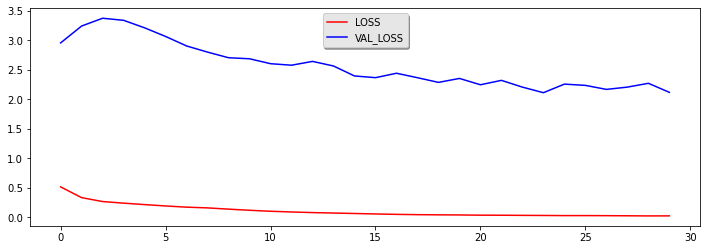

In [60]:
#plotting the graphs for loss and validation loss
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(history.history['loss'], color='red', label='LOSS')
plt.plot(history.history['val_loss'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

In [61]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist[-1], periods=n_future, freq='5t').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [62]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [63]:
train_len=len(predictions_train)
train_len

2832

In [64]:
test_len=len(predictions_future)
test_len

30

In [65]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d %H:%M:%S%z'), '%Y%m%d %H:%M:%S%z')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2021-02-12 13:55:00-05:00,2098.710938
2021-02-12 14:00:00-05:00,2100.204834
2021-02-12 14:05:00-05:00,2099.002197


In [66]:
PREDICTIONS_FUTURE.index = PREDICTIONS_FUTURE.index.to_series().apply(datetime_to_timestamp)

In [67]:
PREDICTIONS_FUTURE

,Open
2021-04-07 15:55:00-04:00,2125.621826
2021-04-07 16:00:00-04:00,2125.694580
2021-04-07 16:05:00-04:00,2125.692139
2021-04-07 16:10:00-04:00,2125.779297
2021-04-07 16:15:00-04:00,2125.753418
2021-04-07 16:20:00-04:00,2124.995361
2021-04-07 16:25:00-04:00,2125.467773
2021-04-07 16:30:00-04:00,2125.322510
2021-04-07 16:35:00-04:00,2125.610107
2021-04-07 16:40:00-04:00,2125.694824


<ipython-input-68-03d1245f2e62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['PREDICTIONS_FUTURE'] = PREDICTIONS_FUTURE


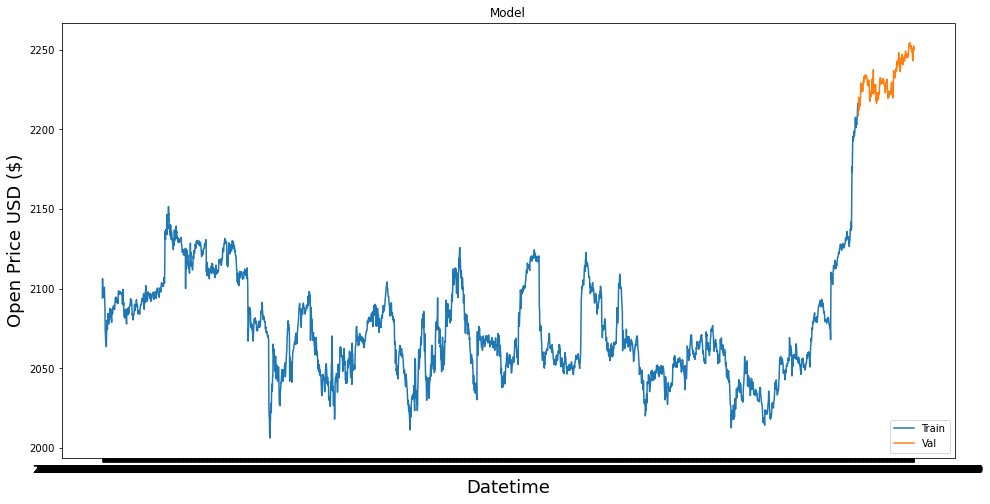

In [68]:
# Plot the data
train = df[:train_len]
valid = df[train_len:]
valid['PREDICTIONS_FUTURE'] = PREDICTIONS_FUTURE
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Datetime', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'PREDICTIONS_FUTURE']])
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()